# Task for January 3 2025

Predict the student exam scores based on the study hours using only numpy (neural network version)

**Forward pass** - calculates output

**Loss calculation** - compare predictions with the actual labels 

**Backward pass** - adjust the weights using the gradients

**Activation function** - It decides whether a neuron should be activated or not.

**Perceptron** - neuron of human brain is like the perceptron of neural network


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [31]:
np.random.seed(42)
hours_studied = np.random.uniform(0, 10, 100)
marks_scored = 5 * hours_studied + np.random.normal(0, 5, 100)

In [20]:
hours_studied = hours_studied / 10
marks_scored = marks_scored / 100

In [21]:
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 10000


In [22]:
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def linear(x):
    return x

In [24]:
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = linear(Z2)
    return Z1, A1, Z2, A2

In [25]:
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [26]:
def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2
    m = X.shape[0]
    
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [27]:
X = hours_studied.reshape(-1, 1)
y = marks_scored.reshape(-1, 1)

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X)
    loss = compute_loss(y, A2)
    backward_propagation(X, y, Z1, A1, Z2, A2)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 3.446206721684908
Epoch 1000, Loss: 0.04803349935183119
Epoch 2000, Loss: 0.018554337021243067
Epoch 3000, Loss: 0.007995383289382395
Epoch 4000, Loss: 0.004133769809994635
Epoch 5000, Loss: 0.0027306334079035665
Epoch 6000, Loss: 0.002226222478897237
Epoch 7000, Loss: 0.002046455159993549
Epoch 8000, Loss: 0.0019827341371877385
Epoch 9000, Loss: 0.0019601867655939524


In [28]:
def predict(hours):
    hours = np.array(hours).reshape(-1, 1) / 10
    _, _, _, predicted_marks = forward_propagation(hours)
    return predicted_marks * 100

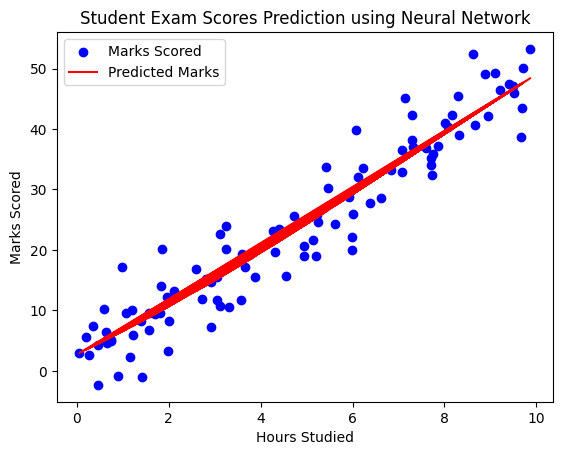

In [29]:
plt.scatter(hours_studied * 10, marks_scored * 100, color='blue', label='Marks Scored')
plt.plot(hours_studied * 10, predict(hours_studied * 10), color='red', label='Predicted Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Student Exam Scores Prediction using Neural Network')
plt.legend()
plt.show()

In [30]:
hours = int(input("Enter the number of hours studies:"))
predicted_marks = predict(hours)
print(f"Predicted marks for {hours} hours studied: {predicted_marks[0][0]:.2f}")

Predicted marks for 12 hours studied: 58.33
